In [ ]:
import numpy as np
import cv2
import math
import os

import random

from matplotlib import pyplot as plt
from collections import deque
from google.colab import drive
from google.colab.patches import cv2_imshow

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from datetime import datetime

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pfad zur CSV-Datei
a_file_path = '/content/drive/My Drive/Colab Notebooks/BV2/Testbilder/A_vs_B/A.csv'
b_file_path = '/content/drive/My Drive/Colab Notebooks/BV2/Testbilder/A_vs_B/B.csv'

# Laden der CSV-Dateien als Pandas DataFrame
a_raw_data = pd.read_csv(a_file_path, delimiter=';')# '; '
a_raw_data['target'] = 1

b_raw_data = pd.read_csv(b_file_path, delimiter=';')
b_raw_data['target'] = -1

ab_raw_data = pd.concat([a_raw_data, b_raw_data], ignore_index=True)

In [ ]:
# Aufteilung in Features und Zielvariable
x = ab_raw_data.drop('target', axis=1)
y = ab_raw_data['target']

# Aufteilung in Trainings- und Testdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#print(y_train.iloc[1])
#print(x_train.iloc[1])
test = y_train.iloc[0]
print(x_train.iloc[1].iloc[3])
x_data_row = x_train.iloc[1]
x1 = x_data_row.iloc[3]

0.7403419097487368


In [ ]:
#Perzeptron
w = np.zeros(2) #Gewichte
n = 0.5 #Lernrate?
# x Eingabewert y geünschtes Ergbenis

def train_perzeptron_old(x_data, y_data, w, threshold):

  for i in range(y_data.shape[0]):
    #x_data_row = x_data.iloc[i]
    y_data_row = y_data.iloc[i]

    y = y_data_row.iloc[1]
    #Wähle Traingsdaten
    x1 = x_data.iloc[i].iloc[3]# Hue 1
    x2 = x_data.iloc[i].iloc[4]# Hue 2
    #Berechne y^
    u = x1 * w[0] + x2 * w[1]
    y_d = 1 if u > threshold else -1
    #Bestimme den Fehler
    d = y - y_d
    #Aktualisiere Gewichte
    w[0] = w[0] + n * d * x1
    w[1] = w[1] + n * d * x2

def train_perzeptron(x_data, y_data, w, threshold):
    for i in range(y_data.shape[0]):
        y = y_data.iloc[i]

        # Wählen Sie Trainingsdaten aus x_data
        x1 = x_data.iloc[i].iloc[3]  # Hue 1
        x2 = x_data.iloc[i].iloc[4]  # Hue 2

        # Berechne vorhergesagter Wert
        u = x1 * w[0] + x2 * w[1]
        y_d = 1 if u > threshold else -1

        # Fehlerbestimmung
        d = y - y_d

        # Aktualisieren der Gewichte
        w[0] = w[0] + n * d * x1
        w[1] = w[1] + n * d * x2


In [ ]:
def test_perzeptron(x_data, y_data, w, threshold):
  for i in range(y_data.shape[0]):
    # Da y_data eine Serie ist, erhalten Sie mit iloc[i] einen Skalarwert
    y = y_data.iloc[i]

    # Wählen Sie Trainingsdaten aus x_data
    x1 = x_data.iloc[i].iloc[3]  # Hue 1
    x2 = x_data.iloc[i].iloc[4]  # Hue 2

    # Berechnen Sie y^ (vorhergesagter Wert)
    u = x1 * w[0] + x2 * w[1]
    y_d = 1 if u > threshold else -1

    #print(f"{x_data.iloc[i].iloc[0]}: {y_d}=={y}, {'Wahr' if y_d == y else 'Falsch'}")


In [ ]:
for i in range(1000):
  #print(w)
  train_perzeptron(x_train, y_train, w, 0)

print(w)

[-51.89291603  13.92560914]


In [ ]:
test_perzeptron(x_test, y_test, w, 0)

In [ ]:
ax = a_raw_data.iloc[:, 3]  # Hue 1
ay = a_raw_data.iloc[:, 4]
bx = b_raw_data.iloc[:, 3]
by = b_raw_data.iloc[:, 4]

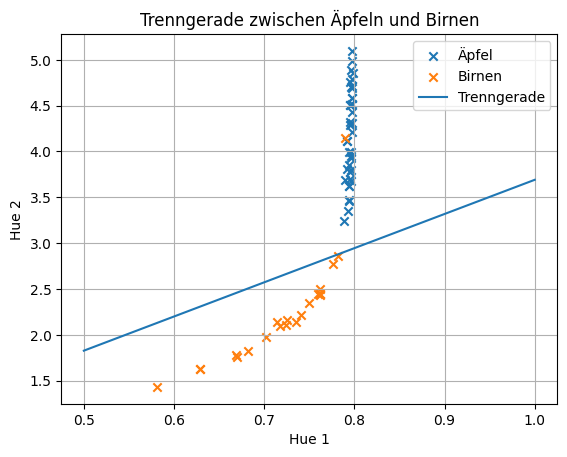

In [ ]:
import matplotlib.pyplot as plt

# Gewichte und Bias
w1 = w[0]  # Ersetzen Sie dies mit Ihrem Wert für w1
w2 = w[1] # Ersetzen Sie dies mit Ihrem Wert für w2
b = 0.5   # Ersetzen Sie dies mit Ihrem Wert für b

# X-Werte definieren (z.B. von -10 bis 10)
x_values = [0.5, 1]

# Y-Werte basierend auf der Geradengleichung berechnen
y_values = [(-w1/w2) * x - b/w2 for x in x_values]

# Plotten
plt.scatter(ax, ay, marker='x', label='Äpfel')
plt.scatter(bx, by, marker='x', label='Birnen')
#plt.quiver(0,0, w2, -w1)

plt.plot(x_values, y_values, label='Trenngerade')
plt.xlabel('Hue 1')
plt.ylabel('Hue 2')
plt.title('Trenngerade zwischen Äpfeln und Birnen')
plt.legend()
plt.grid(True)
plt.savefig(f'/content/drive/My Drive/Colab Notebooks/BV2/apfel_birne_gerade_{datetime.now()}.png', dpi=300)


plt.show()
